# Calcul snc sans glaciers : autre méthode

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import xesmf as xe
import matplotlib.pyplot as plt
import glob

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


## Essai pour un modèle

### Variable snc

In [2]:
path_BCC_CSM2 = os.path.join("~/private-storage/historical-LImon-snc/", "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")

BCC_CSM2 = xr.open_dataset(path_BCC_CSM2)
BCC_CSM2

<xarray.Dataset> Size: 406MB
Dimensions:    (time: 1980, bnds: 2, lat: 160, lon: 320)
Coordinates:
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
  * lon        (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 356.6 357.8 358.9
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 32kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    lon_bnds   (lon, bnds) float64 5kB ...
    snc        (time, lat, lon) float32 406MB ...
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2289.0
    comment:                The model integration starts from the piControl e...
    ...                     ...
    title:                  BCC-CSM2-MR output prepared for CMIP6
    tracking_id:            hdl:21.14100/b44193ab-576d-4f12-b31f-5f319b74252e
    variable_id:            snc
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by BCC is licensed unde...
    cmor_version:           3.3.2

In [3]:
snow_cover_ini = BCC_CSM2["snc"]
snow_cover_ini

<xarray.DataArray 'snc' (time: 1980, lat: 160, lon: 320)> Size: 406MB
[101376000 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
Attributes:
    standard_name:  surface_snow_area_fraction
    long_name:      Snow Area Fraction
    comment:        Fraction of each grid cell that is occupied by snow that ...
    units:          %
    original_name:  SNC
    cell_methods:   area: time: mean (interval: 20 minutes)
    cell_measures:  area: areacella
    history:        2018-11-14T10:00:09Z altered by CMOR: replaced missing va...

### Variables de masques

In [4]:
# sftgif
path_sftgif_BCC_CSM2 = os.path.join("~/private-storage/masques/masques/pseudo_sftgif/", "sftgif_BCC-CSM2-MR.nc")

sftgif_BCC_CSM2 = xr.open_dataset(path_sftgif_BCC_CSM2)
sftgif_BCC_CSM2

<xarray.Dataset> Size: 216kB
Dimensions:   (lon: 320, bnds: 2, lat: 160)
Coordinates:
  * lon       (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat       (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 5kB ...
    lat_bnds  (lat, bnds) float64 3kB ...
    sftgif    (lat, lon) float32 205kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Tue Sep 03 22:30:58 2019: cdo remapbil,grid_BCC-C...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

In [5]:
sftgif = sftgif_BCC_CSM2["sftgif"]

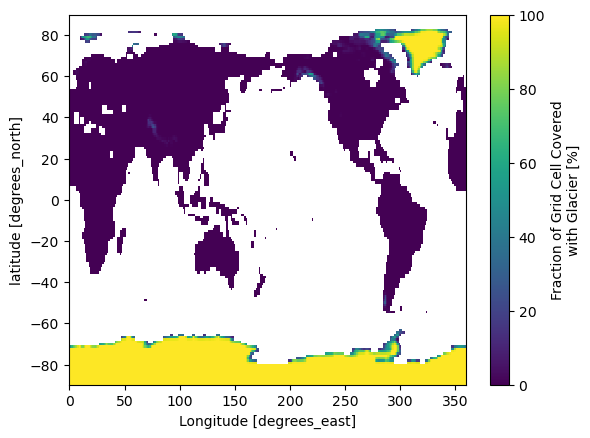

In [6]:
sftgif.plot()

In [7]:
# sftlf
path_sftlf_BCC_CSM2 = os.path.join("~/private-storage/masques/masques/pseudo_sftlf/", "sftlf_BCC-CSM2-MR.nc")

sftlf_BCC_CSM2 = xr.open_dataset(path_sftlf_BCC_CSM2)
sftlf_BCC_CSM2

<xarray.Dataset> Size: 216kB
Dimensions:   (lon: 320, bnds: 2, lat: 160)
Coordinates:
  * lon       (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * lat       (lat) float64 1kB -89.14 -88.03 -86.91 ... 86.91 88.03 89.14
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 5kB ...
    lat_bnds  (lat, bnds) float64 3kB ...
    sftlf     (lat, lon) float32 205kB ...
Attributes: (12/54)
    CDI:                    Climate Data Interface version 1.6.8 (http://mpim...
    history:                Wed Sep 04 19:44:19 2019: cdo remapbil,grid_BCC-C...
    source:                 CNRM-CM6-1 (2017):  aerosol: prescribed monthly f...
    institution:            CNRM (Centre National de Recherches Meteorologiqu...
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /scratch/work/voldoire/outputs/CMIP6/DECK/CNRM-CM...
    ...                     ...
    CMIP6_CV_version:       cv=6.2.3.0-7-g2019642
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    CDO:                    Climate Data Operators version 1.6.8 (http://mpim...

In [8]:
sftlf = sftlf_BCC_CSM2["sftlf"]

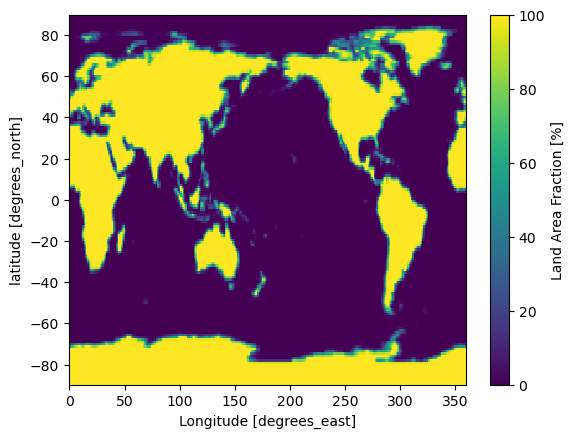

In [9]:
sftlf.plot()

### Variable areacella

In [10]:
path_areacella_BCC_CSM2_initial = os.path.join("/home/jovyan/private-storage/masques/masques/pseudo_areacella/", "areacella_BCC-CSM2-MR.nc")

areacella_BCC_CSM2_initial = xr.open_dataset(path_areacella_BCC_CSM2_initial)

In [11]:
cell_area_ini = areacella_BCC_CSM2_initial["areacella"]

### Arrondi à 4 ch

In [12]:
snow_cover_ini.coords['lat'] = snow_cover_ini.coords['lat'].round(4)
snow_cover_ini.coords['lon'] = snow_cover_ini.coords['lon'].round(4)

cell_area_ini.coords['lat'] = cell_area_ini.coords['lat'].round(4)
cell_area_ini.coords['lon'] = cell_area_ini.coords['lon'].round(4)

sftgif.coords['lat'] = sftgif.coords['lat'].round(4)
sftgif.coords['lon'] = sftgif.coords['lon'].round(4)

sftlf.coords['lat'] = sftlf.coords['lat'].round(4)
sftlf.coords['lon'] = sftlf.coords['lon'].round(4)

snow_cover_ini = snow_cover_ini.reindex_like(sftgif, method='nearest')
cell_area_ini = cell_area_ini.reindex_like(sftlf, method='nearest')

### Calculs

In [13]:
snc = snow_cover_ini#* cell_area_ini *1e-6

In [14]:
sna1 = snc * (sftlf/100)

In [15]:
sna2 = sna1 * ((100 - sftgif)/100)
sna2

<xarray.DataArray (time: 1980, lat: 160, lon: 320)> Size: 406MB
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9

In [47]:
sna2_north_20 = sna2.sel(lat=sna2.lat>=20)

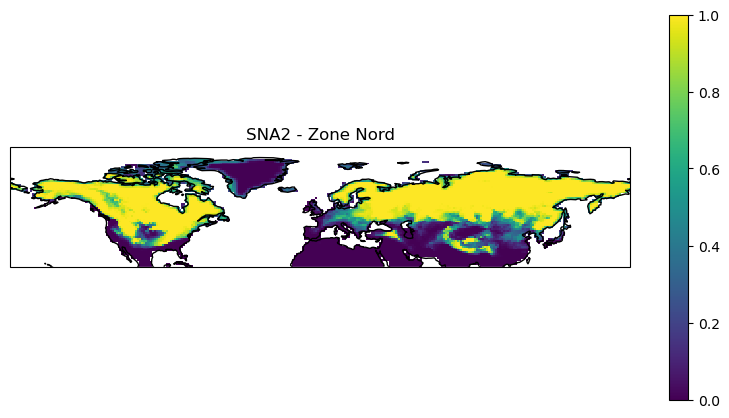

In [49]:
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

sna2_north_20.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
ax.coastlines()
plt.title("SNA2 - Zone Nord")
plt.show()

In [50]:
sna2_ref = sna2_north_20.sel(time=slice("1995", "2014"))
sna2_ref

<xarray.DataArray (time: 240, lat: 62, lon: 320)> Size: 19MB
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 2kB 1995-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 496B 20.75 21.87 22.99 24.11 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9

In [51]:
snow_cover = sna2_ref.groupby("time.month").mean(dim="time")
snow_cover

<xarray.DataArray (month: 12, lat: 62, lon: 320)> Size: 952kB
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 496B 20.75 21.87 22.99 24.11 ... 86.91 88.03 89.14
  * lon      (lon) float64 3kB 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

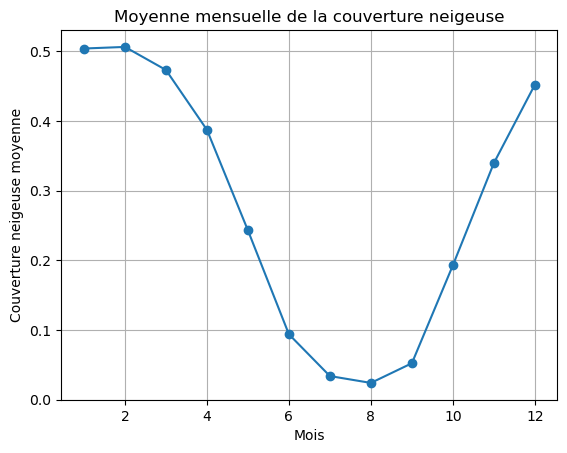

In [52]:
monthly_mean = snow_cover.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean, marker = "o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

### En km2

In [53]:
sna_km2 = sna2_ref * cell_area_ini * 1e-6

In [54]:
snow_cover_km2 = sna_km2.groupby("time.month").mean(dim="time")

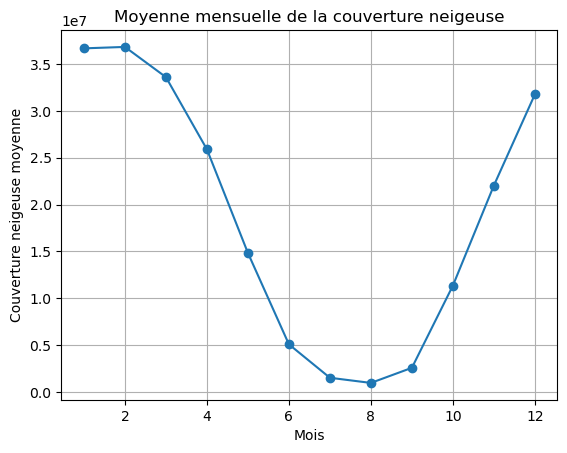

In [55]:
snow_cover_km2 = snow_cover_km2.sum(dim=("lat", "lon"))

plt.plot(range(1, 13), snow_cover_km2, marker = "o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

## Essai pour modèle interpolé

### Variable snc

In [56]:
BCC_CSM2_regrid_xe = xr.open_dataset("/home/jovyan/private-storage/interp_models_hist_bis/BCC-CSM2-MR_hist_reprojete.nc")

snow_cover_regrid_xe = BCC_CSM2_regrid_xe["snc"]
snow_cover_regrid_xe

<xarray.DataArray 'snc' (time: 1980, lat: 180, lon: 360)> Size: 513MB
[128304000 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

### Variables de masques

In [57]:
# sftgif
path_interp_sftgif_BCC_CSM2 = os.path.join("~/private-storage/interp_sftgif_bis", "BCC-CSM2-MR_sftgif_reprojete.nc")

interp_sftgif_BCC_CSM2 = xr.open_dataset(path_interp_sftgif_BCC_CSM2)
interp_sftgif_BCC_CSM2

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftgif   (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  nearest_s2d

In [58]:
sftgif_interp = interp_sftgif_BCC_CSM2["sftgif"]

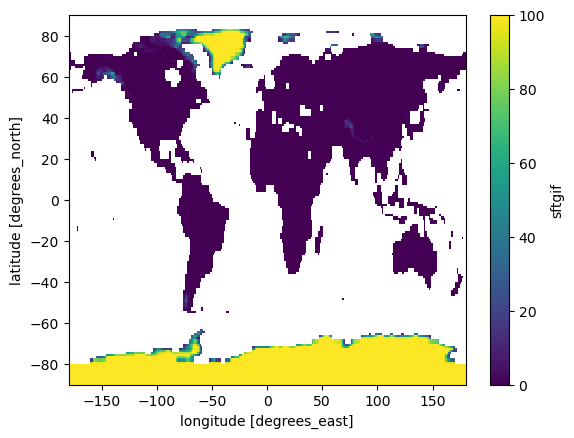

In [59]:
sftgif_interp.plot()

In [60]:
# sftlf 
path_interp_sftlf_BCC_CSM2 = os.path.join("~/private-storage/interp_sftlf_bis", "BCC-CSM2-MR_sftlf_reprojete.nc")

interp_sftlf_BCC_CSM2 = xr.open_dataset(path_interp_sftlf_BCC_CSM2)
interp_sftlf_BCC_CSM2

<xarray.Dataset> Size: 264kB
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    sftlf    (lat, lon) float32 259kB ...
Attributes:
    regrid_method:  nearest_s2d

In [61]:
sftlf_interp = interp_sftlf_BCC_CSM2["sftlf"]

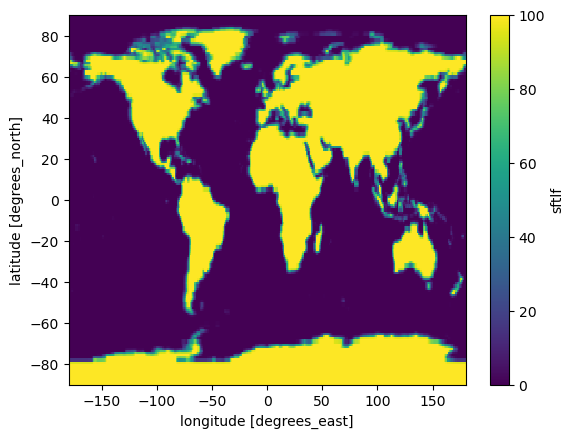

In [62]:
sftlf_interp.plot()

### Variable areacella

In [63]:
path_areacella_BCC_CSM2_recalcule = os.path.join("~/private-storage/areacella_recalcule_cdo_bis", "BCC-CSM2-MR_gridarea_hist_recalcule.nc")

areacella_BCC_CSM2_recalcule = xr.open_dataset(path_areacella_BCC_CSM2_recalcule)
areacella_BCC_CSM2_recalcule

<xarray.Dataset> Size: 523kB
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 3kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    cell_area  (lat, lon) float64 518kB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Apr 09 11:36:15 2025: cdo gridarea /home/jovyan/private...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [64]:
cell_area_interp = areacella_BCC_CSM2_recalcule["cell_area"]

### Arrondi à 4 ch

In [65]:
snow_cover_regrid_xe.coords['lat'] = snow_cover_regrid_xe.coords['lat'].round(4)
snow_cover_regrid_xe.coords['lon'] = snow_cover_regrid_xe.coords['lon'].round(4)

cell_area_interp.coords['lat'] = cell_area_interp.coords['lat'].round(4)
cell_area_interp.coords['lon'] = cell_area_interp.coords['lon'].round(4)

sftgif_interp.coords['lat'] = sftgif_interp.coords['lat'].round(4)
sftgif_interp.coords['lon'] = sftgif_interp.coords['lon'].round(4)

sftlf_interp.coords['lat'] = sftlf_interp.coords['lat'].round(4)
sftlf_interp.coords['lon'] = sftlf_interp.coords['lon'].round(4)

snow_cover_regrid_xe = snow_cover_regrid_xe.reindex_like(sftgif_interp, method='nearest')
cell_area_interp = cell_area_interp.reindex_like(sftlf_interp, method='nearest')

### Calculs

In [66]:
snc_interp = snow_cover_regrid_xe #* cell_area_interp *1e-6
sna1_interp = snc_interp * (sftlf_interp/100)
sna2_interp = sna1_interp * ((100 - sftgif_interp)/100)
sna2_interp

<xarray.DataArray (time: 1980, lat: 180, lon: 360)> Size: 513MB
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [67]:
sna2_north_20_interp = sna2_interp.sel(lat=sna2_interp.lat>=20)

In [68]:
sna2_north_20_interp = sna2_north_20_interp.sortby('lat', ascending=False)

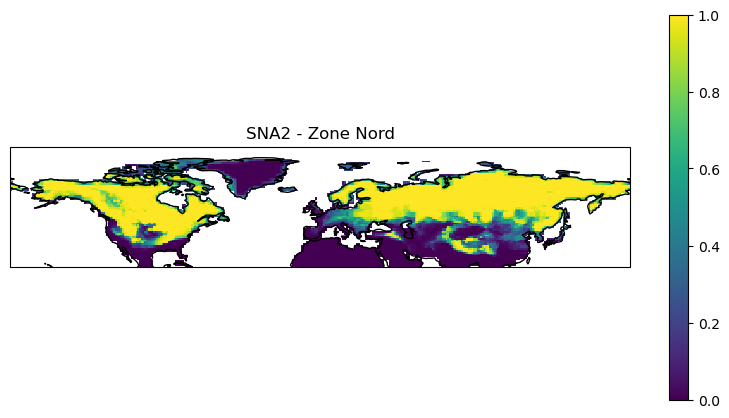

In [69]:
import cartopy.crs as ccrs

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

sna2_north_20_interp.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')
ax.coastlines()
plt.title("SNA2 - Zone Nord")
plt.show()

In [70]:
sna2_interp_ref = sna2_north_20_interp.sel(time=slice("1995", "2014"))
sna2_interp_ref

<xarray.DataArray (time: 240, lat: 70, lon: 360)> Size: 24MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 2kB 1995-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 560B 89.5 88.5 87.5 86.5 85.5 ... 23.5 22.5 21.5 20.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [71]:
snow_cover_interp = sna2_interp_ref.groupby("time.month").mean(dim="time")
snow_cover_interp

<xarray.DataArray (month: 12, lat: 70, lon: 360)> Size: 1MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 560B 89.5 88.5 87.5 86.5 85.5 ... 23.5 22.5 21.5 20.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

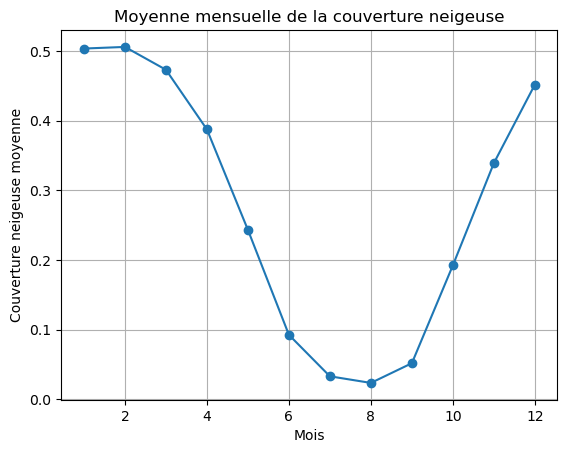

In [72]:
monthly_mean_interp = snow_cover_interp.mean(dim=("lat", "lon"))

plt.plot(range(1, 13), monthly_mean_interp, marker = "o")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.grid()
plt.show()

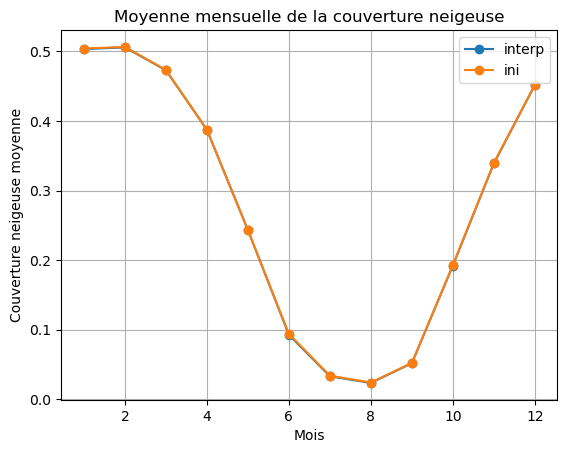

In [83]:
plt.plot(range(1, 13), monthly_mean_interp, marker = "o", label="interp")
plt.plot(range(1, 13), monthly_mean, marker = "o", label="ini")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.legend()
plt.grid()
plt.show()

In [74]:
sna_interp_km2 = sna2_interp_ref * cell_area_interp * 1e-6

In [80]:
snow_cover_interp_km2 = sna_interp_km2.groupby("time.month").mean(dim="time")

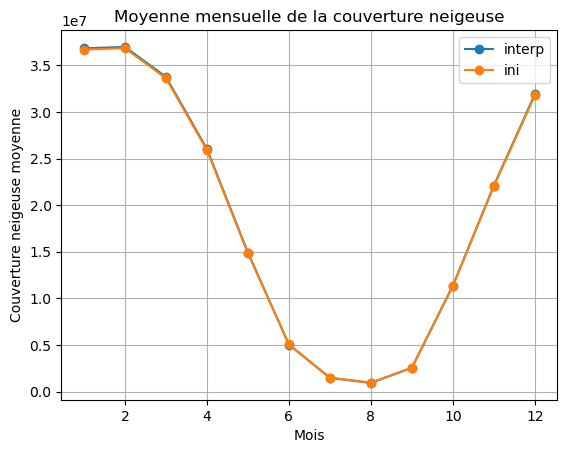

In [81]:
snow_cover_interp_km2 = snow_cover_interp_km2.sum(dim=("lat", "lon"))

plt.plot(range(1, 13), snow_cover_interp_km2, marker = "o", label="interp")
plt.plot(range(1, 13), snow_cover_km2, marker = "o", label="ini")
plt.xlabel("Mois")
plt.ylabel("Couverture neigeuse moyenne")
plt.title("Moyenne mensuelle de la couverture neigeuse")
plt.legend()
plt.grid()
plt.show()

In [77]:
snow_cover_km2

<xarray.DataArray (month: 12)> Size: 96B
array([36682860.1497925 , 36835992.31171221, 33608617.78572809,
       25896478.09416727, 14832388.88918238,  5074679.71495535,
        1503661.22176439,   952654.36536581,  2565924.81887365,
       11341876.81033481, 22032998.59389033, 31763034.34136973])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [78]:
snow_cover_interp_km2

<xarray.DataArray (month: 12)> Size: 96B
array([36816731.2427883 , 36970557.4730742 , 33757563.92758885,
       26029226.25261534, 14916923.86947139,  5033073.75633271,
        1466988.67696013,   928314.38691405,  2552801.14093417,
       11356341.86356776, 22098906.05495121, 31895118.27348785])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12